### Reading and manipulating Climate data layers

#### just some logging/plotting magic to output in this notebook, nothing to care about.

In [1]:
import logging
root = logging.getLogger()
root.addHandler(logging.StreamHandler())
import matplotlib.pyplot as plt
%matplotlib inline

### Load raster data (downloaded from WorldClim) on maximum temperature per month.
Loading the data prints also some useful information on the number of raster bands, coordinate reference system, driver, affine transformation, height/width, and bounding box. The availability of this metadata depends on the content of the header file associated with the raster data.

In [2]:
from iSDM.environment import ClimateLayer
worldclim_max_june =  ClimateLayer(file_path="../data/tmax1/tmax6.bil") 
worldclim_max_june.load_data()

Loading data from ../data/tmax1/tmax6.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='../data/tmax1/tmax6.bil' mode='r'>

We can set the source of this data (as additional metadata)

In [3]:
from iSDM.environment import Source
worldclim_max_june.set_source(Source.WORLDCLIM)

This can also be done at the same time while creating the ClimateLayer.  ** Always load the data before reading it**

In [4]:
worldclim_max_june =  ClimateLayer(file_path="../data/tmax1/tmax6.bil", source=Source.WORLDCLIM)
worldclim_max_june.load_data()

Loading data from ../data/tmax1/tmax6.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='../data/tmax1/tmax6.bil' mode='r'>

#### To read the actual data, use ***.read()*** with optional parameter specifying a particular band (or layer). To read all layers in one 3D array datastructure:

In [5]:
worldclim_data = worldclim_max_june.read() # read all bands

In [6]:
worldclim_data

array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ..., 
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]]], dtype=int16)

In [7]:
worldclim_data.shape # 3600 rows, 8640 columns, 1 band

(1, 3600, 8640)

#### To read a particular band, pass its index

In [8]:
worldclim_data = worldclim_max_june.read(1) # read band 1

In [9]:
worldclim_data.shape # now it's flat matrix datastructure, for that particular band

(3600, 8640)

In [10]:
worldclim_data

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ..., 
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

#### To access metadata values of the Climate layer we created above, use:

In [11]:
worldclim_max_june.metadata['nodata']  # this returns the "nodata" value used for cells with no data.

-9999.0

Close the dataset to release memory, once you are done

In [12]:
worldclim_max_june.close_dataset()

Dataset ../data/tmax1/tmax6.bil closed. 


Trying to read a closed dataset ... 

In [13]:
worldclim_max_june.read(1) # read band 1

The dataset is closed. Please load it first using .load_data()


The ***worldclim_max_june*** Climate layer instance remembers the file from which it loaded data last time, so you can simply load it again.

In [14]:
worldclim_max_june.load_data()

Loading data from ../data/tmax1/tmax6.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='../data/tmax1/tmax6.bil' mode='r'>

... unless of course you decide to change the file from which to load:

In [15]:
worldclim_max_june.load_data("../data/tmax1/tmax1.bil") # let's take january instead of june

Loading data from ../data/tmax1/tmax1.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='../data/tmax1/tmax1.bil' mode='r'>

In [16]:
worldclim_max_june.resolution  # some more information...

(0.041666666666667, 0.041666666666667)

Python even allows you to freely add properties of this layer object:

In [17]:
worldclim_max_june.mynote = "Random metadata note"

In [18]:
worldclim_max_june.mynote

'Random metadata note'

In [19]:
worldclim_data = worldclim_max_june.read(1) # read the data again, since we loaded a new dataset (january)

Going back to the band data we loaded, let's **find the minimum and maximum values**:

In [20]:
worldclim_data.max() # Units = deg C * 10

419

In [21]:
worldclim_data.min() 

-9999

#### Hm, the minimum is not a real value, but the "nodata" value. We want to ignore it when computing a true minimum:

In [22]:
worldclim_data[worldclim_data!=-9999].min()

-489

...which is equivalent to:

In [23]:
worldclim_data[worldclim_data!=worldclim_max_june.metadata['nodata']].min()

-489

Plotting the raster data is just a bit more involved:

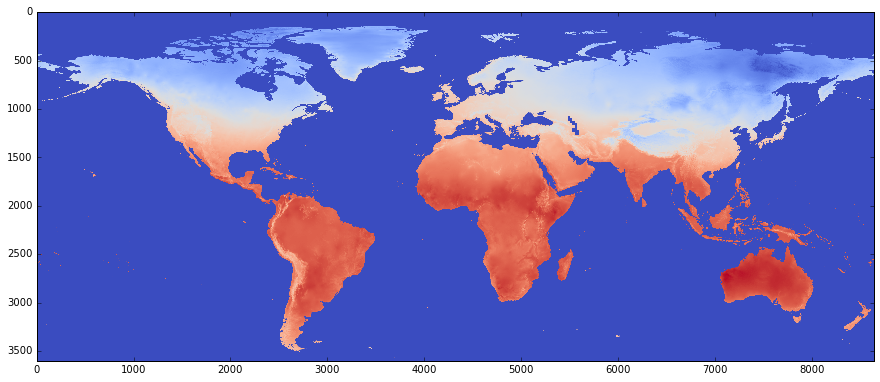

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
value_min = worldclim_data[worldclim_data!=-9999].min()
value_max = worldclim_data.max()
ax.imshow(worldclim_data, cmap="coolwarm", vmin=value_min, vmax=value_max)

Remember, we only stored the actual pixel values in worldclim_data. It is just a numpy array.

In [25]:
type(worldclim_data)

numpy.ndarray

### Let's resample the data at a lower resolution.

In [26]:
worldclim_max_june.reproject(destination_file="../data/tmax1/tmax1_lower_res.bil", resolution=3.0)

Calculated default transformation:
Affine:
| 3.00, 0.00,-180.00|
| 0.00,-3.00, 90.00|
| 0.00, 0.00, 1.00| 
 width=121, height=51
Reprojected data in ../data/tmax1/tmax1_lower_res.bil 


The reprojected data is stored in a separate ***destination_file*** in order to not overwrite the original data (btw do we want that?). Let's load that data now. Notice the resolution and the height/width

In [27]:
worldclim_max_june.load_data("../data/tmax1/tmax1_lower_res.bil")

Loading data from ../data/tmax1/tmax1_lower_res.bil 
Metadata: {'affine': Affine(3.0, 0.0, -180.000000000003,
       0.0, -3.0, 90.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 51,
 'nodata': -9999.0,
 'transform': (-180.000000000003, 3.0, 0.0, 90.0, 0.0, -3.0),
 'width': 121} 
Resolution: (3.0, 3.0) 
Bounds: BoundingBox(left=-180.000000000003, bottom=-63.0, right=182.999999999997, top=90.0) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='../data/tmax1/tmax1_lower_res.bil' mode='r'>

In [28]:
worldclim_data_low_res = worldclim_max_june.read(1)

In [29]:
worldclim_data_low_res.shape # height, width

(51, 121)

Plot the data again. Notice it is "pixelized" i.e., not that smooth because of lower resolution.

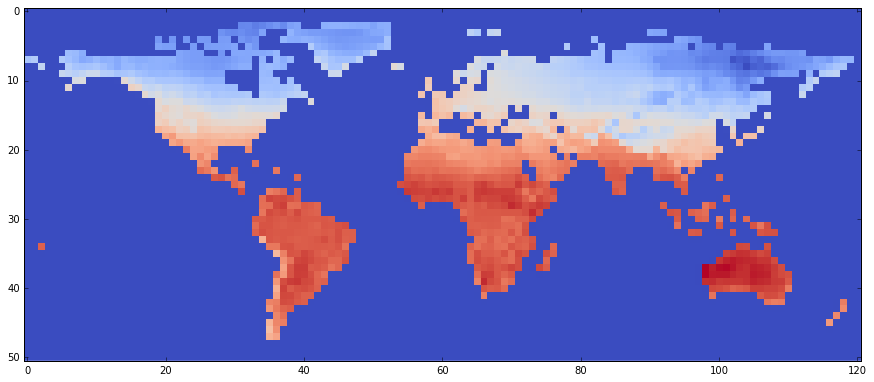

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))
value_min = worldclim_data_low_res[worldclim_data_low_res!=-9999].min()
value_max = worldclim_data_low_res.max()
ax.imshow(worldclim_data_low_res, cmap="coolwarm", interpolation="none", vmin=value_min, vmax=value_max)

There are several algorithms for resampling the data in a different resolution. These are based on the GDAL implementation: ***nearest (default), bilinear, cubic, cubicspline, lanczos, average, mode***. 
### To use a different resampling algorithm than the default:

In [31]:
from rasterio.warp import RESAMPLING
worldclim_max_june.load_data("../data/tmax1/tmax1.bil")
worldclim_max_june.reproject(destination_file="../data/tmax1/tmax1_lower_res.bil", resolution=3.0, resampling=RESAMPLING.cubic_spline)

Loading data from ../data/tmax1/tmax1.bil 
Metadata: {'affine': Affine(0.041666666666667, 0.0, -180.00000000000335,
       0.0, -0.041666666666667, 90.00000000000003),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 3600,
 'nodata': -9999.0,
 'transform': (-180.00000000000335,
               0.041666666666667,
               0.0,
               90.00000000000003,
               0.0,
               -0.041666666666667),
 'width': 8640} 
Resolution: (0.041666666666667, 0.041666666666667) 
Bounds: BoundingBox(left=-180.00000000000335, bottom=-60.000000000001165, right=179.9999999999995, top=90.00000000000003) 
Dataset loaded. Use .read() or .read_masks() to access the layers.
Calculated default transformation:
Affine:
| 3.00, 0.00,-180.00|
| 0.00,-3.00, 90.00|
| 0.00, 0.00, 1.00| 
 width=121, height=51
Reprojected data in ../data/tmax1/tmax1_lower_res.bil 


Load the data again, and visualize it

In [32]:
worldclim_max_june.load_data("../data/tmax1/tmax1_lower_res.bil")
worldclim_data_low_res = worldclim_max_june.read(1)

Loading data from ../data/tmax1/tmax1_lower_res.bil 
Metadata: {'affine': Affine(3.0, 0.0, -180.000000000003,
       0.0, -3.0, 90.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 51,
 'nodata': -9999.0,
 'transform': (-180.000000000003, 3.0, 0.0, 90.0, 0.0, -3.0),
 'width': 121} 
Resolution: (3.0, 3.0) 
Bounds: BoundingBox(left=-180.000000000003, bottom=-63.0, right=182.999999999997, top=90.0) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


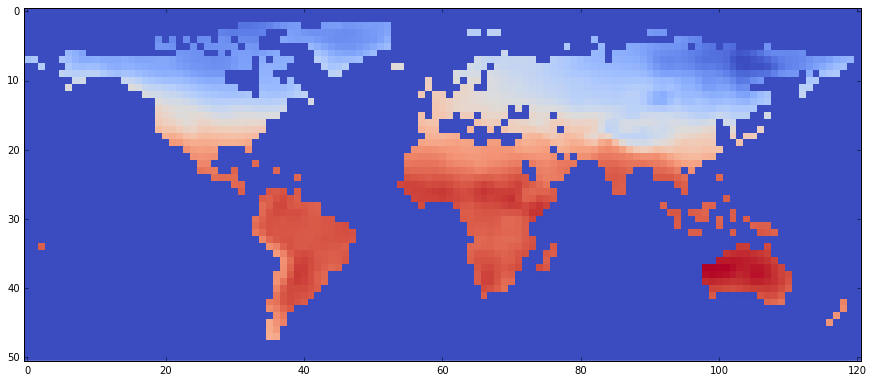

In [33]:
fig, ax = plt.subplots(figsize=(15, 15))
value_min = worldclim_data_low_res[worldclim_data_low_res!=-9999].min()
value_max = worldclim_data_low_res.max()
ax.imshow(worldclim_data_low_res, cmap="coolwarm", interpolation="none", vmin=value_min, vmax=value_max)

The original coordinate reference system is 'epsg:4326'. The target coordinate system may be any of the usual GDAL/OGR forms, complete WKT, PROJ.4, EPSG:n.
For more complex examples of reprojection based on new bounds, dimensions, and resolution, using rasterio:
https://github.com/mapbox/rasterio/blob/master/docs/reproject.rst
and using gdal:
http://www.geos.ed.ac.uk/~smudd/TopoTutorials/html/tutorial_raster_conversion.html
(rasterio works on top of GDAL)

as well as the command line interface:
https://github.com/mapbox/rasterio/blob/master/docs/cli.rst#warp

### DEM layers have the same functionality as climate (raster data)

In [34]:
from iSDM.environment import DEMLayer
dem_layer =  DEMLayer(file_path="../data/alt_5m_bil/alt.bil") # altitude data from http://www.worldclim.org/current
dem_layer.load_data()

Loading data from ../data/alt_5m_bil/alt.bil 
Metadata: {'affine': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 1800,
 'nodata': -9999.0,
 'transform': (-180.0,
               0.08333333333333333,
               0.0,
               90.0,
               0.0,
               -0.08333333333333333),
 'width': 4320} 
Resolution: (0.08333333333333333, 0.08333333333333333) 
Bounds: BoundingBox(left=-180.0, bottom=-60.0, right=180.0, top=90.0) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


<open RasterReader name='../data/alt_5m_bil/alt.bil' mode='r'>

In [35]:
from iSDM.environment import Source
dem_layer.set_source(Source.WORLDCLIM)

In [36]:
dem_data = dem_layer.read() # read all bands
dem_data = dem_layer.read(1) # read band 1

In [37]:
dem_data.shape # == height x width

(1800, 4320)

In [38]:
dem_layer.metadata['nodata']

-9999.0

In [39]:
dem_data.max() # Units = meters

6485

In [40]:
dem_data[dem_data!=-9999].min()

-415

Plot the raster (always calculate the vmin/vmax)

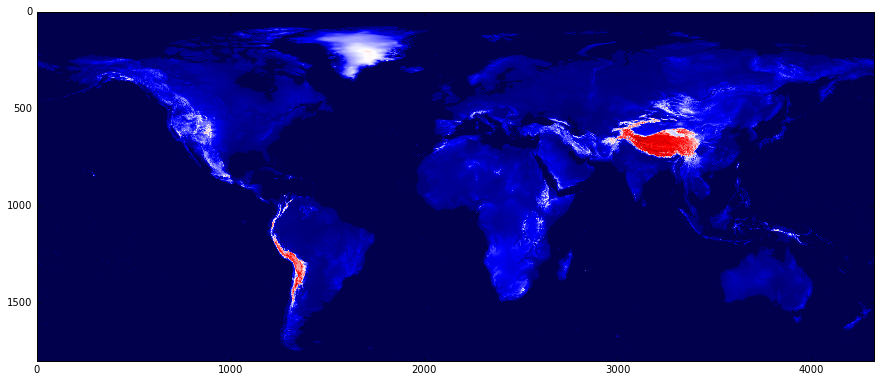

In [41]:
fig, ax = plt.subplots(figsize=(15, 15))
value_min = dem_data[dem_data!=-9999].min()
value_max = dem_data.max()
ax.imshow(dem_data, cmap="seismic", vmin=value_min, vmax=value_max)  # or cmap="terrain"?

Reproject to a lower resolution (the value is the pixel size, in terms of the Units - degrees in this case)

In [42]:
dem_layer.reproject(destination_file="../data/alt_5m_bil/downscaled.bil", resolution=2.0)

Calculated default transformation:
Affine:
| 2.00, 0.00,-180.00|
| 0.00,-2.00, 90.00|
| 0.00, 0.00, 1.00| 
 width=180, height=75
Reprojected data in ../data/alt_5m_bil/downscaled.bil 


Load the projection (shall we make an "overwrite" option to avoid loading every time) to visualize it

In [43]:
dem_layer.load_data("../data/alt_5m_bil/downscaled.bil")
dem_low_res = dem_layer.read(1)

Loading data from ../data/alt_5m_bil/downscaled.bil 
Metadata: {'affine': Affine(2.0, 0.0, -180.0,
       0.0, -2.0, 90.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 75,
 'nodata': -9999.0,
 'transform': (-180.0, 2.0, 0.0, 90.0, 0.0, -2.0),
 'width': 180} 
Resolution: (2.0, 2.0) 
Bounds: BoundingBox(left=-180.0, bottom=-60.0, right=180.0, top=90.0) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


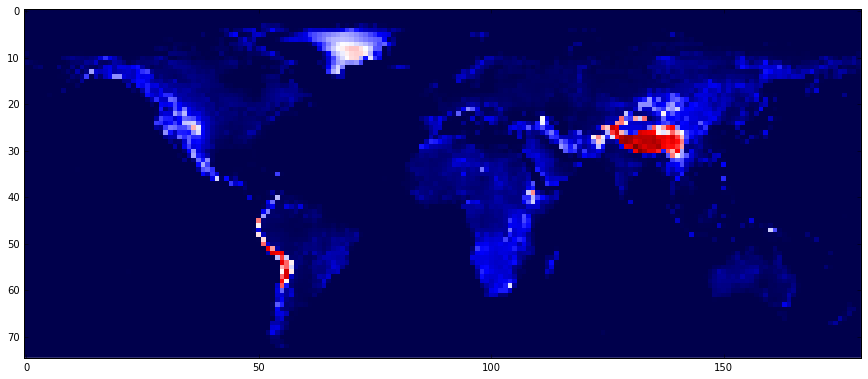

In [44]:
fig, ax = plt.subplots(figsize=(15, 15))
value_min = dem_low_res[dem_low_res!=-9999].min()
value_max = dem_low_res.max()
ax.imshow(dem_low_res, cmap="seismic", interpolation="none", vmin=value_min, vmax=value_max)

Load back the original data and crop it with a bounding box

In [45]:
dem_layer.load_data("../data/alt_5m_bil/alt.bil")
dem_layer.reproject(destination_file="../data/alt_5m_bil/cropped.bil", left=-50, bottom=42,right=-76, top=54)

Loading data from ../data/alt_5m_bil/alt.bil 
Metadata: {'affine': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 1800,
 'nodata': -9999.0,
 'transform': (-180.0,
               0.08333333333333333,
               0.0,
               90.0,
               0.0,
               -0.08333333333333333),
 'width': 4320} 
Resolution: (0.08333333333333333, 0.08333333333333333) 
Bounds: BoundingBox(left=-180.0, bottom=-60.0, right=180.0, top=90.0) 
Dataset loaded. Use .read() or .read_masks() to access the layers.
Calculated default transformation:
Affine:
| 0.08, 0.00,-76.00|
| 0.00,-0.08, 54.00|
| 0.00, 0.00, 1.00| 
 width=312, height=144
Reprojected data in ../data/alt_5m_bil/cropped.bil 


Load the cropped data to visualize (notice the BoundingBox values of the loaded data, they match with the values we specified above)

Loading data from ../data/alt_5m_bil/cropped.bil 
Metadata: {'affine': Affine(0.0833333333333333, 0.0, -75.99999999999997,
       0.0, -0.0833333333333333, 53.999999999999964),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 144,
 'nodata': -9999.0,
 'transform': (-75.99999999999997,
               0.0833333333333333,
               0.0,
               53.999999999999964,
               0.0,
               -0.0833333333333333),
 'width': 312} 
Resolution: (0.0833333333333333, 0.0833333333333333) 
Bounds: BoundingBox(left=-75.99999999999997, bottom=41.99999999999997, right=-49.999999999999986, top=53.999999999999964) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


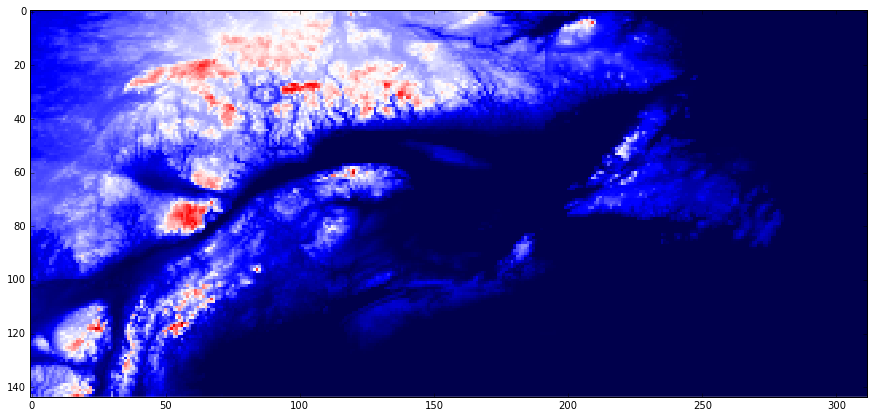

In [46]:
dem_layer.load_data("../data/alt_5m_bil/cropped.bil")
dem_cropped = dem_layer.read(1)
fig, ax = plt.subplots(figsize=(15, 15))
value_min = dem_cropped[dem_cropped!=-9999].min()
value_max = dem_cropped.max()
ax.imshow(dem_cropped, cmap="seismic", interpolation="none", vmin=value_min, vmax=value_max)

Lower the resolution of the cropped area

In [47]:
dem_layer.reproject(destination_file="../data/alt_5m_bil/cropped_downscaled.bil", resolution=1.0)

Calculated default transformation:
Affine:
| 1.00, 0.00,-76.00|
| 0.00,-1.00, 54.00|
| 0.00, 0.00, 1.00| 
 width=26, height=13
Reprojected data in ../data/alt_5m_bil/cropped_downscaled.bil 


Loading data from ../data/alt_5m_bil/cropped_downscaled.bil 
Metadata: {'affine': Affine(1.0, 0.0, -76.0,
       0.0, -1.0, 54.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'EHdr',
 'dtype': 'int16',
 'height': 13,
 'nodata': -9999.0,
 'transform': (-76.0, 1.0, 0.0, 54.0, 0.0, -1.0),
 'width': 26} 
Resolution: (1.0, 1.0) 
Bounds: BoundingBox(left=-76.0, bottom=41.0, right=-50.0, top=54.0) 
Dataset loaded. Use .read() or .read_masks() to access the layers.


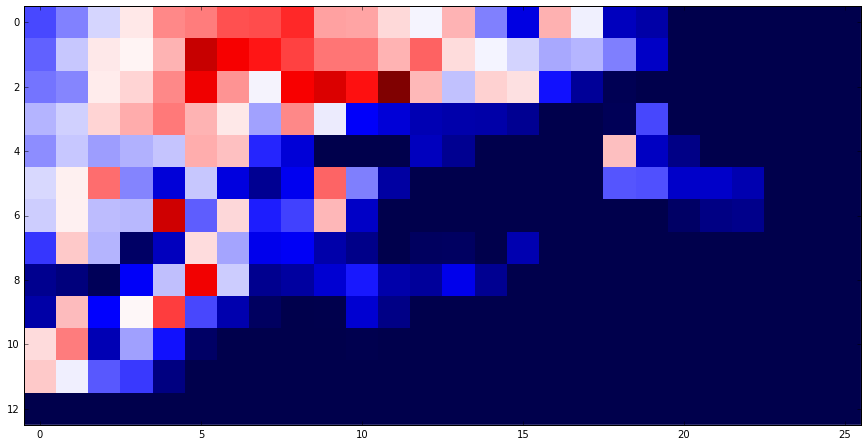

In [48]:
dem_layer.load_data("../data/alt_5m_bil/cropped_downscaled.bil")
dem_cropped_downscaled = dem_layer.read(1)
fig, ax = plt.subplots(figsize=(15, 15))
value_min = dem_cropped_downscaled[dem_cropped_downscaled!=-9999].min()
value_max = dem_cropped_downscaled.max()
ax.imshow(dem_cropped_downscaled, cmap="seismic", interpolation="none", vmin=value_min, vmax=value_max)